DESCRIPTION

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, scipy.stats
sns.set()
!curl -o ./Walmart_Store_sales.csv https://raw.githubusercontent.com/rahul23aug/real_world_projects/main/Walmart_Store_sales.csv
dataset = pd.read_csv('/content/Walmart_Store_sales.csv')
from sklearn.cluster import KMeans

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  355k  100  355k    0     0  1382k      0 --:--:-- --:--:-- --:--:-- 1382k


In [3]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
dataset['Date'] = pd.to_datetime(dataset['Date'], dayfirst=True)
dataset['Week_number'] = dataset['Date'].apply(lambda x : x.weekofyear)
dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_number
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42


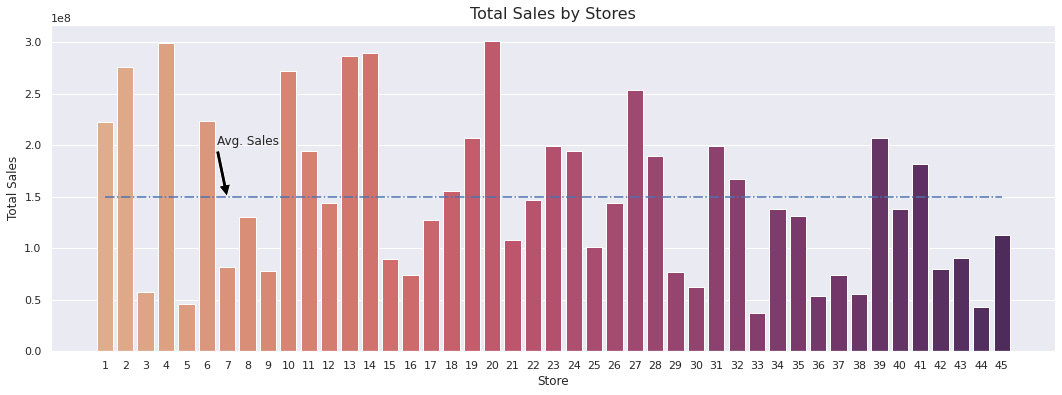

In [7]:
sales_by_store = pd.DataFrame(dataset['Weekly_Sales'].groupby(dataset['Store']).agg(['sum']))
sales_by_store

plt.figure(figsize=(18,6))
sns.barplot(data= sales_by_store, x = sales_by_store.index, y = 'sum', palette='flare')
_ = plt.xticks(rotation = 0)
_ = plt.title('Total Sales by Stores', fontsize= 16)
_ = plt.ylabel('Total Sales')
_ = plt.plot(sales_by_store['sum'].mean()* np.ones((sales_by_store.shape[0],1)), '-.')
_= plt.annotate('Avg. Sales', xy=(6,sales_by_store['sum'].mean()), xytext=(5.5,200000000) ,arrowprops = dict(facecolor = "black", shrink = 0.005))

Observation #1: some stores perform poorly

In [8]:
cum_sum = sales_by_store.sort_values(by='sum',ascending=False)
cum_sum['sum'] = cum_sum['sum'] / cum_sum['sum'].sum()
cum_sum['sum'] = cum_sum['sum'] * 100
cum_sum['sum'] = np.cumsum(cum_sum['sum'] )
cum_sum[cum_sum['sum'] <= 80.0].index, len(cum_sum[cum_sum['sum'] <= 80.0].index)

(Int64Index([20,  4, 14, 13,  2, 10, 27,  6,  1, 39, 19, 31, 23, 24, 11, 28, 41,
             32, 18, 22, 12, 26, 34, 40, 35,  8],
            dtype='int64', name='Store'), 26)

Observation: 

Store Numbers 20,  4, 14, 13,  2, 10, 27,  6,  1, 39, 19, 31, 23, 24, 11, 28, 41, 32, 18, 22, 12, 26, 34, 40, 35 and 8 are responsible for 80% sales

26 / 47 stores fall in this category



In [9]:

deviation_by_store =pd.DataFrame([])
for i in dataset['Store'].unique():
  deviation_by_store['Store '+str(i)]= np.array(dataset['Weekly_Sales'][dataset['Store'] == i])
deviation_by_store

,Store 1,Store 2,Store 3,Store 4,Store 5,Store 6,Store 7,Store 8,Store 9,Store 10,Store 11,Store 12,Store 13,Store 14,Store 15,Store 16,Store 17,Store 18,Store 19,Store 20,Store 21,Store 22,Store 23,Store 24,Store 25,Store 26,Store 27,Store 28,Store 29,Store 30,Store 31,Store 32,Store 33,Store 34,Store 35,Store 36,Store 37,Store 38,Store 39,Store 40,Store 41,Store 42,Store 43,Store 44,Store 45
0,1643690.90,2136989.46,461622.22,2135143.87,317173.10,1652635.10,496725.44,1004137.09,549505.55,2193048.75,1528008.64,1100046.37,1967220.53,2623469.95,652122.44,477409.30,789036.02,1205307.50,1507637.17,2401395.47,798593.88,1033017.37,1364721.58,1388725.63,677231.63,1034119.21,1874289.79,1672352.29,538634.46,465108.52,1469252.05,1087616.19,274593.43,956228.96,1230613.50,467546.74,536006.73,358496.14,1230596.80,1001943.80,1086533.18,543384.01,647029.28,281090.95,890689.51
1,1641957.44,2137809.50,420728.96,2188307.39,311825.70,1606283.86,524104.92,994801.40,552677.48,2176028.52,1574684.08,1117863.33,2030933.46,1704218.84,682447.10,472044.28,841951.91,1187880.70,1536549.95,2109107.90,809321.44,1022571.25,1380892.08,1414107.10,583364.02,1015684.09,1745362.72,1558968.49,529672.95,497374.57,1543947.23,1123566.12,294882.83,994610.99,1168815.31,469563.70,529852.70,342214.90,1266229.07,955338.29,1075656.34,575709.96,682918.99,286857.13,656988.64
2,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,1503298.70,1095421.65,1970274.64,2204556.70,660838.75,469868.70,800714.00,1150663.42,1515976.11,2161549.76,867283.25,988467.61,1319588.04,1385362.49,676260.67,999348.55,1945070.33,1491300.42,542399.07,463513.26,1473386.75,1082559.06,296850.83,983963.07,1270658.64,470281.03,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04
3,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,1336404.65,1048617.17,1817850.32,2095591.63,564883.20,443242.17,749549.55,1068157.45,1373270.06,1898193.95,749597.24,899761.48,1198709.65,1158722.74,628516.57,855385.01,1390934.27,1542173.33,488417.61,472330.71,1344354.41,1053247.10,284052.77,905756.13,1020651.74,447519.44,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65
4,1554806.68,1991013.13,415202.04,1971057.44,288855.71,1601348.82,491419.55,881503.95,507297.88,1987090.09,1426622.65,1077018.27,1939980.43,2237544.75,605325.43,444181.85,783300.05,1179738.50,1495844.57,2119213.72,747444.32,1009201.24,1311175.93,1412387.37,665750.06,1005669.58,1313729.72,1608435.45,535087.91,472591.07,1384870.51,1066566.74,291484.89,918295.79,1162610.27,480203.43,519255.68,372239.89,1266254.21,990152.28,1063557.49,554972.42,658600.05,284617.27,777951.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1437059.26,1746470.56,389813.02,2027620.23,310141.68,1369131.46,525545.76,884724.41,516361.06,1694862.41,1227430.73,880415.67,1927664.11,1522512.20,553901.97,469607.73,972716.24,1002856.20,1338299.02,2008350.58,647097.65,976479.51,1319035.06,1259278.36,683300.84,964726.37,1540687.63,1129508.61,489674.23,425410.04,1279080.58,1157111.15,242813.51,928629.31,814099.86,270677.98,527953.14,398468.08,1495607.07,919595.44,1307928.01,505978.46,577792.32,355307.94,713173.95
139,1670785.97,1998321.04,443557.65,2209835.43,343048.29,1518177.71,505830.56,976436.02,606755.30,1758971.38,1422794.26,979825.92,2041918.74,1687592.16,573498.64,471281.68,952609.17,1092204.79,1408016.10,2246411.89,651768.91,1009887.36,1464616.59,1416720.54,699536.73,1095504.26,1591816.88,1462941.03,520632.80,446751.45,1363365.05,1202775.24,265444.90,968896.68,866064.40,277137.86,546122.37,458479.01,1574408.67,1069112.00,1400160.95,593162.53,642614.89,337390.44,733455.07
140,1573072.81,1900745.13,410804.39,2133026.07,325345.41,1459396.84,503463.93,927511.99,558464.80,

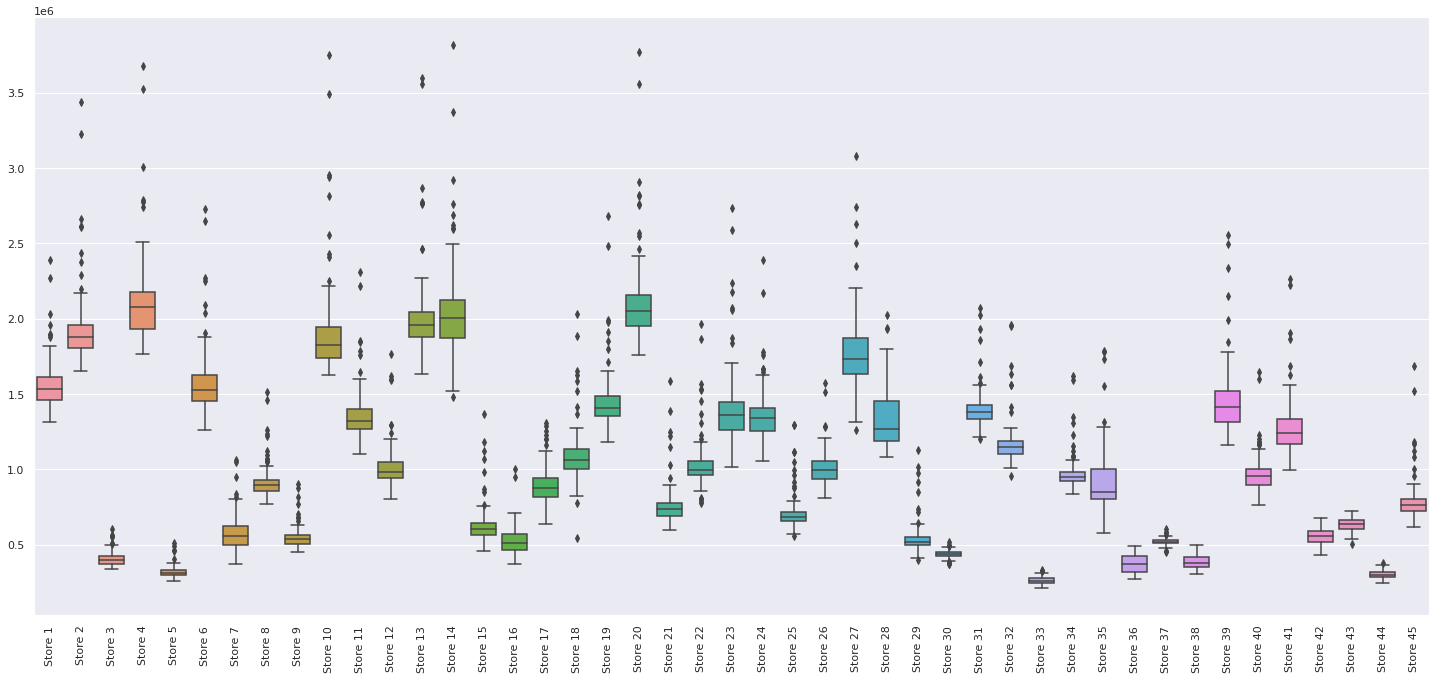

In [10]:
plt.figure(figsize=(25,11))
sns.boxplot(data=deviation_by_store)
plt.xticks(rotation = 90);

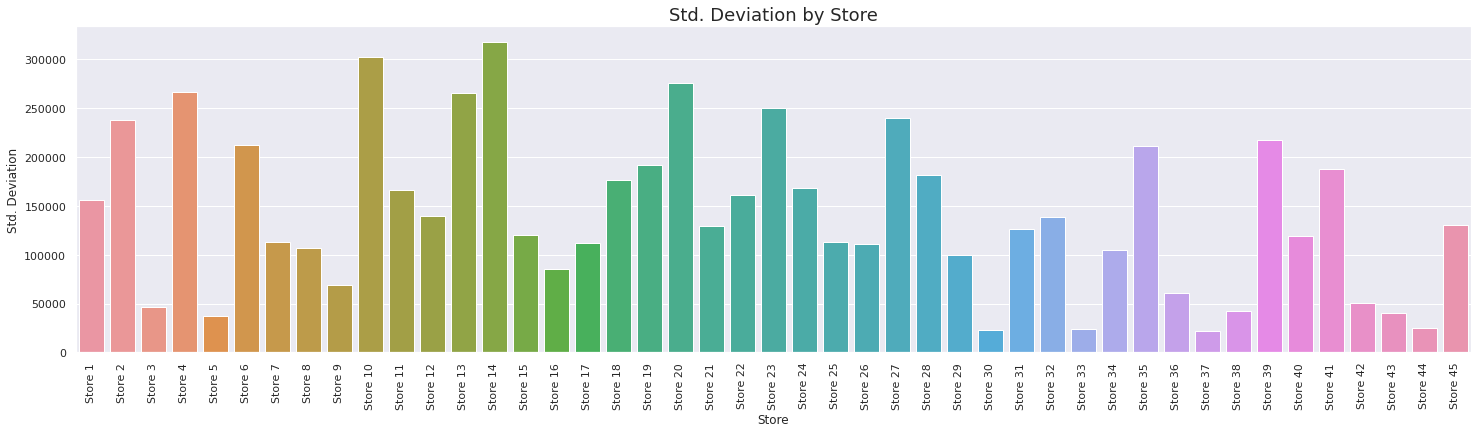

In [11]:
plt.figure(figsize=(25,6))
sns.barplot(y = deviation_by_store.std().values, x = deviation_by_store.std().index)
plt.xticks(rotation = 90);
plt.title('Std. Deviation by Store', fontsize = 18);
plt.xlabel('Store');
plt.ylabel('Std. Deviation');

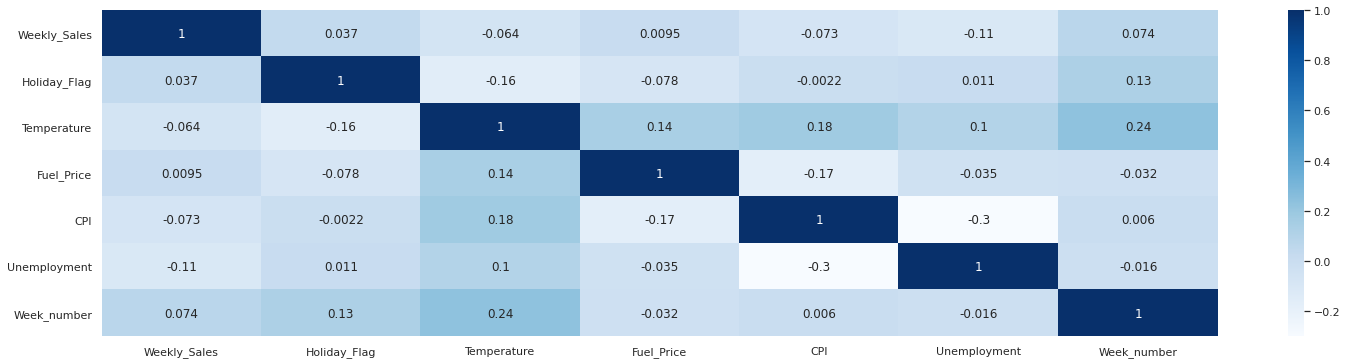

In [12]:
plt.figure(figsize=(25,6))
sns.heatmap(dataset.drop('Store', axis = 1).corr(), annot=True, cmap='Blues')

A complete view of corellations may not help since preferences can be different location wise

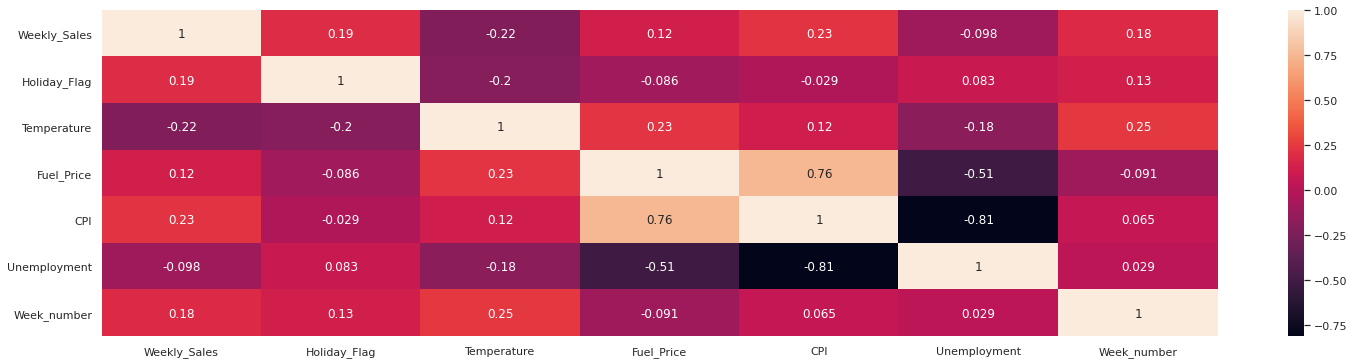

In [13]:
plt.figure(figsize=(25,6))
sns.heatmap(dataset[dataset['Store']==1].drop('Store', axis = 1).corr(), annot=True)

Assumptions of location stands valid check correlation based on store

In [14]:
corr_df = pd.DataFrame([])
for i in dataset['Store'].unique():
  corr_df['Store ' + str(i)] = dataset[['Weekly_Sales', 'Holiday_Flag', 'Temperature',  'Fuel_Price', 'CPI' ,'Unemployment']][dataset['Store']==i].corr()['Weekly_Sales'].values
corr_df.index = dataset[['Weekly_Sales', 'Holiday_Flag', 'Temperature',  'Fuel_Price', 'CPI' ,'Unemployment']][dataset['Store']==1].corr()['Weekly_Sales'].index
corr_df

,Store 1,Store 2,Store 3,Store 4,Store 5,Store 6,Store 7,Store 8,Store 9,Store 10,Store 11,Store 12,Store 13,Store 14,Store 15,Store 16,Store 17,Store 18,Store 19,Store 20,Store 21,Store 22,Store 23,Store 24,Store 25,Store 26,Store 27,Store 28,Store 29,Store 30,Store 31,Store 32,Store 33,Store 34,Store 35,Store 36,Store 37,Store 38,Store 39,Store 40,Store 41,Store 42,Store 43,Store 44,Store 45
Weekly_Sales,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Holiday_Flag,0.194905,0.177726,0.208556,0.153388,0.302525,0.150424,0.248766,0.172383,0.179264,0.195119,0.152674,0.255340,0.113405,0.086305,0.189688,0.152345,0.211512,0.131950,0.189520,0.140983,0.150505,0.096199,0.080062,0.194128,0.080266,0.172268,0.134279,0.234237,0.187405,-0.020753,0.227655,0.074198,0.031160,0.197760,0.201414,-0.026605,-0.143336,-0.027163,0.127115,0.101524,0.097854,0.061810,0.017768,-0.074599,0.106357
Temperature,-0.222701,-0.297673,-0.377524,-0.225583,-0.175517,-0.084863,0.015077,-0.312324,-0.208343,-0.432569,-0.278503,-0.379416,-0.137746,-0.199851,-0.050541,0.182948,0.081012,-0.144278,-0.080805,-0.264983,-0.177084,-0.082892,0.056257,0.111833,-0.031311,0.211722,0.121809,-0.376506,-0.129144,-0.330816,-0.262192,-0.111681,0.019244,-0.278523,0.043392,-0.094454,-0.300493,0.032993,0.064738,0.090598,0.106761,-0.151639,0.095272,0.267822,-0.201945
Fuel_Price,0.124592,-0.196375,0.140886,0.211549,0.167352,-0.103356,0.110356,0.029752,0.205404,-0.185058,-0.041299,0.015072,0.076500,-0.350340,-0.190398,-0.002426,0.311631,-0.275051,-0.190684,-0.013507,-0.136542,-0.074896,0.018392,-0.105005,-0.084262,0.023475,-0.227238,-0.142722,-0.092129,-0.431441,0.109563,0.118010,-0.059887,0.013688,-0.498197,-0.727462,0.208218,0.697184,0.266659,0.029627,0.305745,0.323031,-0.342037,0.607367,-0.046663
CPI,0.225408,-0.062431,0.317250,0.351157,0.308261,-0.011357,0.289044,0.120255,0.294805,-0.115374,0.069781,0.084087,0.163976,-0.419755,-0.174467,0.124285,0.348571,-0.193541,-0.155341,0.058706,-0.163649,-0.038602,0.084248,-0.013684,-0.010914,0.131980,-0.213082,-0.095908,-0.072530,-0.298188,0.132887,0.196782,-0.052271,0.115437,-0.424107,-0.915095,0.244507,0.812837,0.428043,0.113318,0.392293,0.360859,-0.285686,0.740150,-0.023548
Unemployment,-0.097955,0.066325,-0.230413,-0.337015,-0.207043,0.044251,-0.165382,-0.052580,-0.191534,0.131908,-0.020339,-0.009286,-0.171633,0.210786,0.078905,-0.070864,-0.263600,0.139179,0.101464,-0.095341,0.218367,0.039043,-0.077169,-0.012261,-0.004958,-0.066899,-0.014275,0.136671,0.084682,0.201862,-0.064738,-0.099455,0.101175,0.017010,0.483865,0.833734,-0.221287,-0.785290,-0.384681,-0.112528,-0.350630,-0.356355,-0.201954,-0.780076,-0.004041


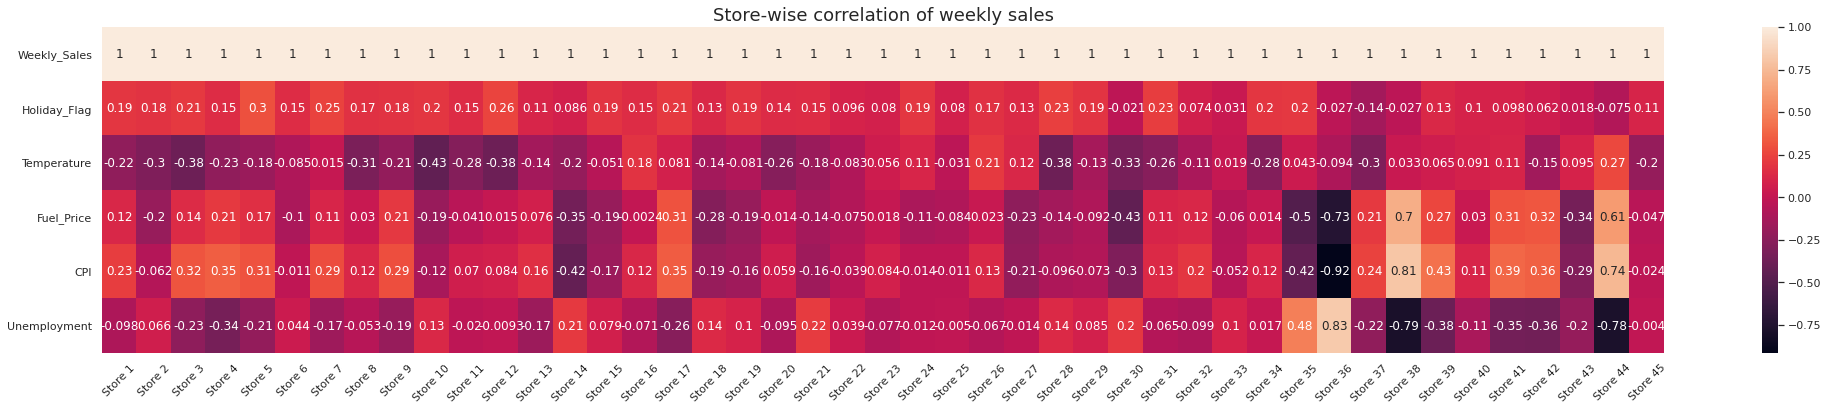

In [15]:
plt.figure(figsize=(35,6))
sns.heatmap(corr_df, annot=True)
plt.title('Store-wise correlation of weekly sales', fontsize=18);
plt.xticks(rotation =45);

corr shows non-linearity based on store

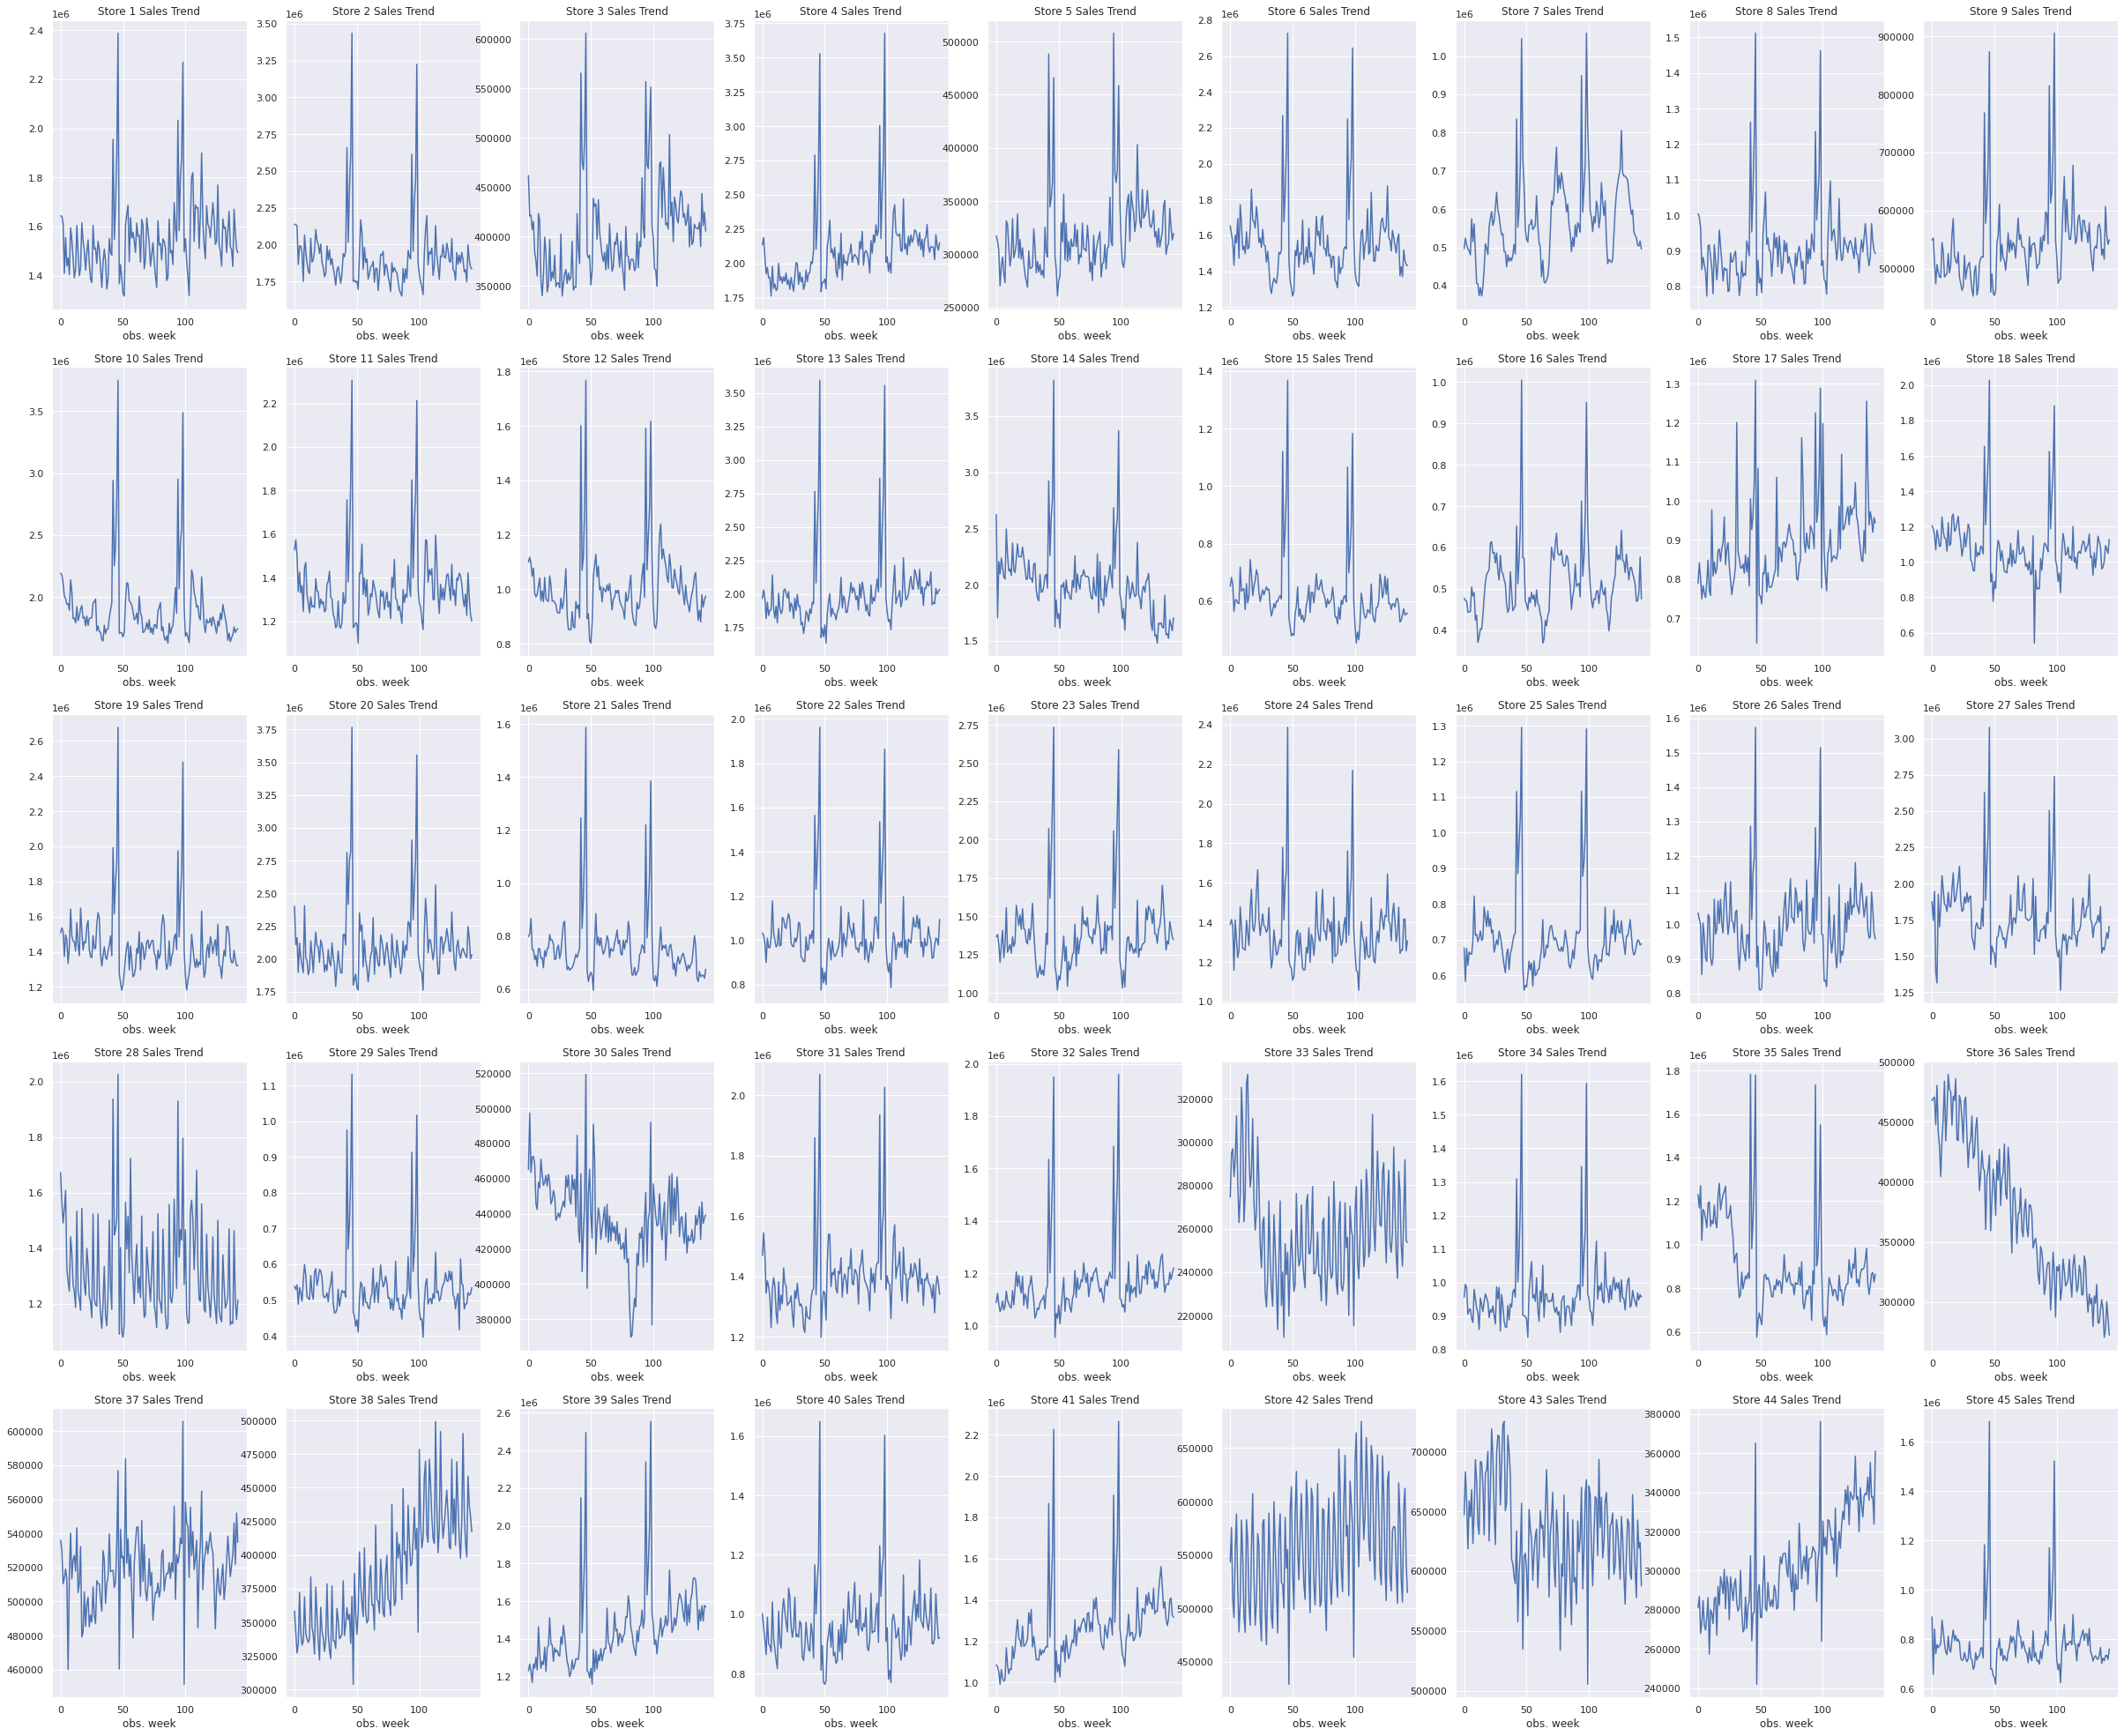

In [16]:
fig, ax = plt.subplots(5,9,figsize=(42, 35))
c = 0
for i in range(5):
  for j in range(9):
    c +=1
    ax[i][j].plot([p for p in range(len( dataset['Weekly_Sales'][dataset['Store']==c]))] , dataset['Weekly_Sales'][dataset['Store']==c])
    ax[i][j].title.set_text('Store ' + str(c)+ ' Sales Trend')
    ax[i][j].set_xlabel( 'obs. week')

Majority stores show a seasonal trend

Checking if  stores consisting of 80% sales for the brand show this trend 




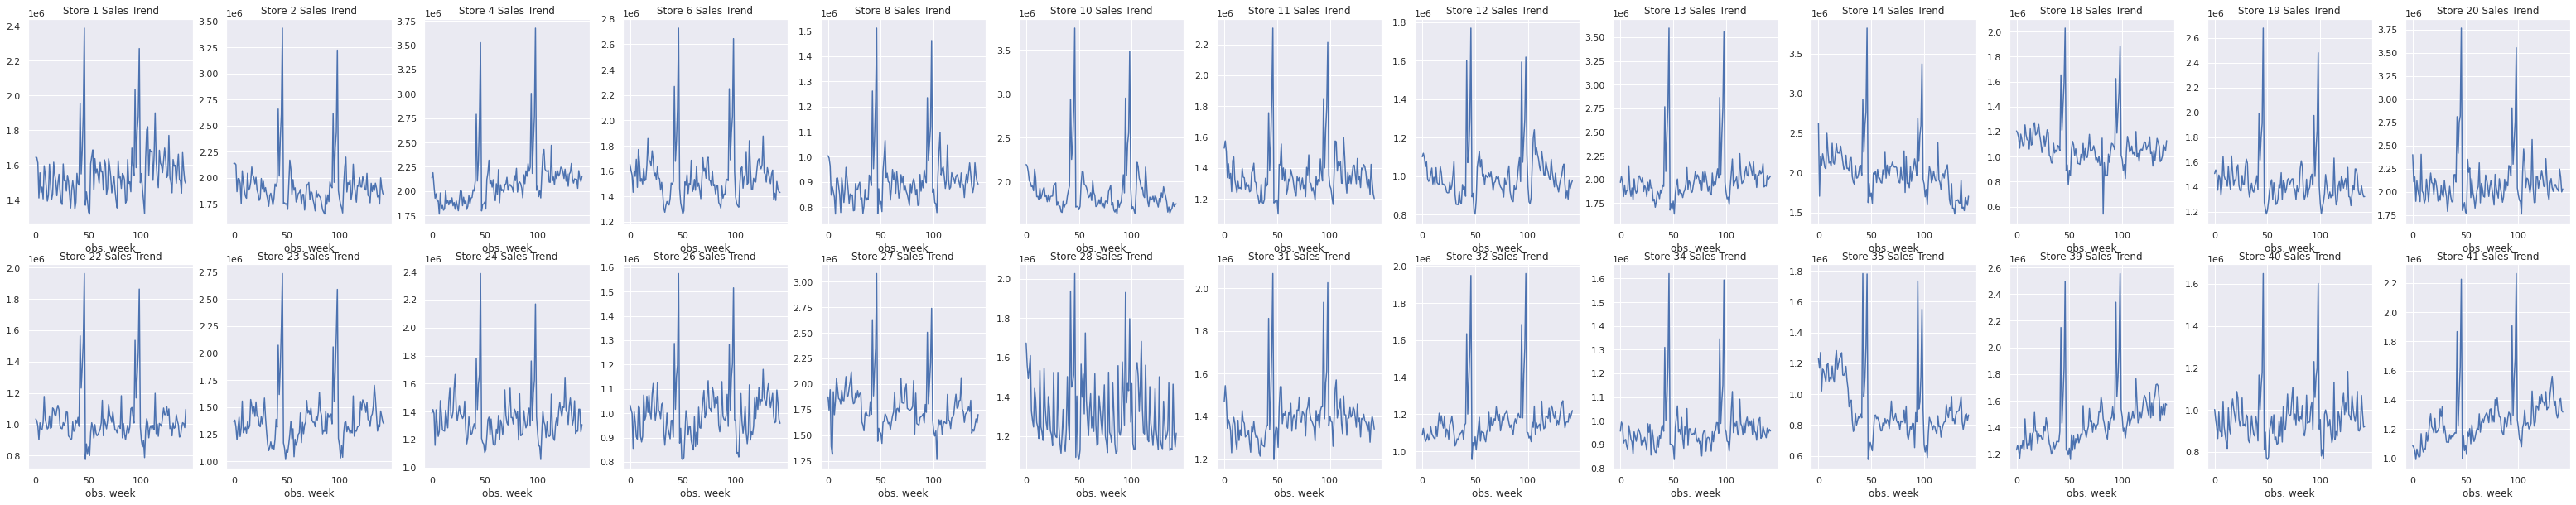

In [17]:
fig, ax = plt.subplots(2,13,figsize=(55, 10))
c = [20,  4, 14, 13,  2, 10, 27,  6,  1, 39, 19, 31, 23, 24, 11, 28, 41,
             32, 18, 22, 12, 26, 34, 40, 35,  8]
c.sort()
m = 0
for i in range(2):
  for j in range(13):  
    ax[i][j].plot([p for p in range(len( dataset['Weekly_Sales'][dataset['Store']==c[m]]))] , dataset['Weekly_Sales'][dataset['Store']==c[m]])
    ax[i][j].title.set_text('Store ' + str(c[m])+ ' Sales Trend')
    ax[i][j].set_xlabel( 'obs. week')
    m+=1

The spikes seen are during Christmas holiday promotion 

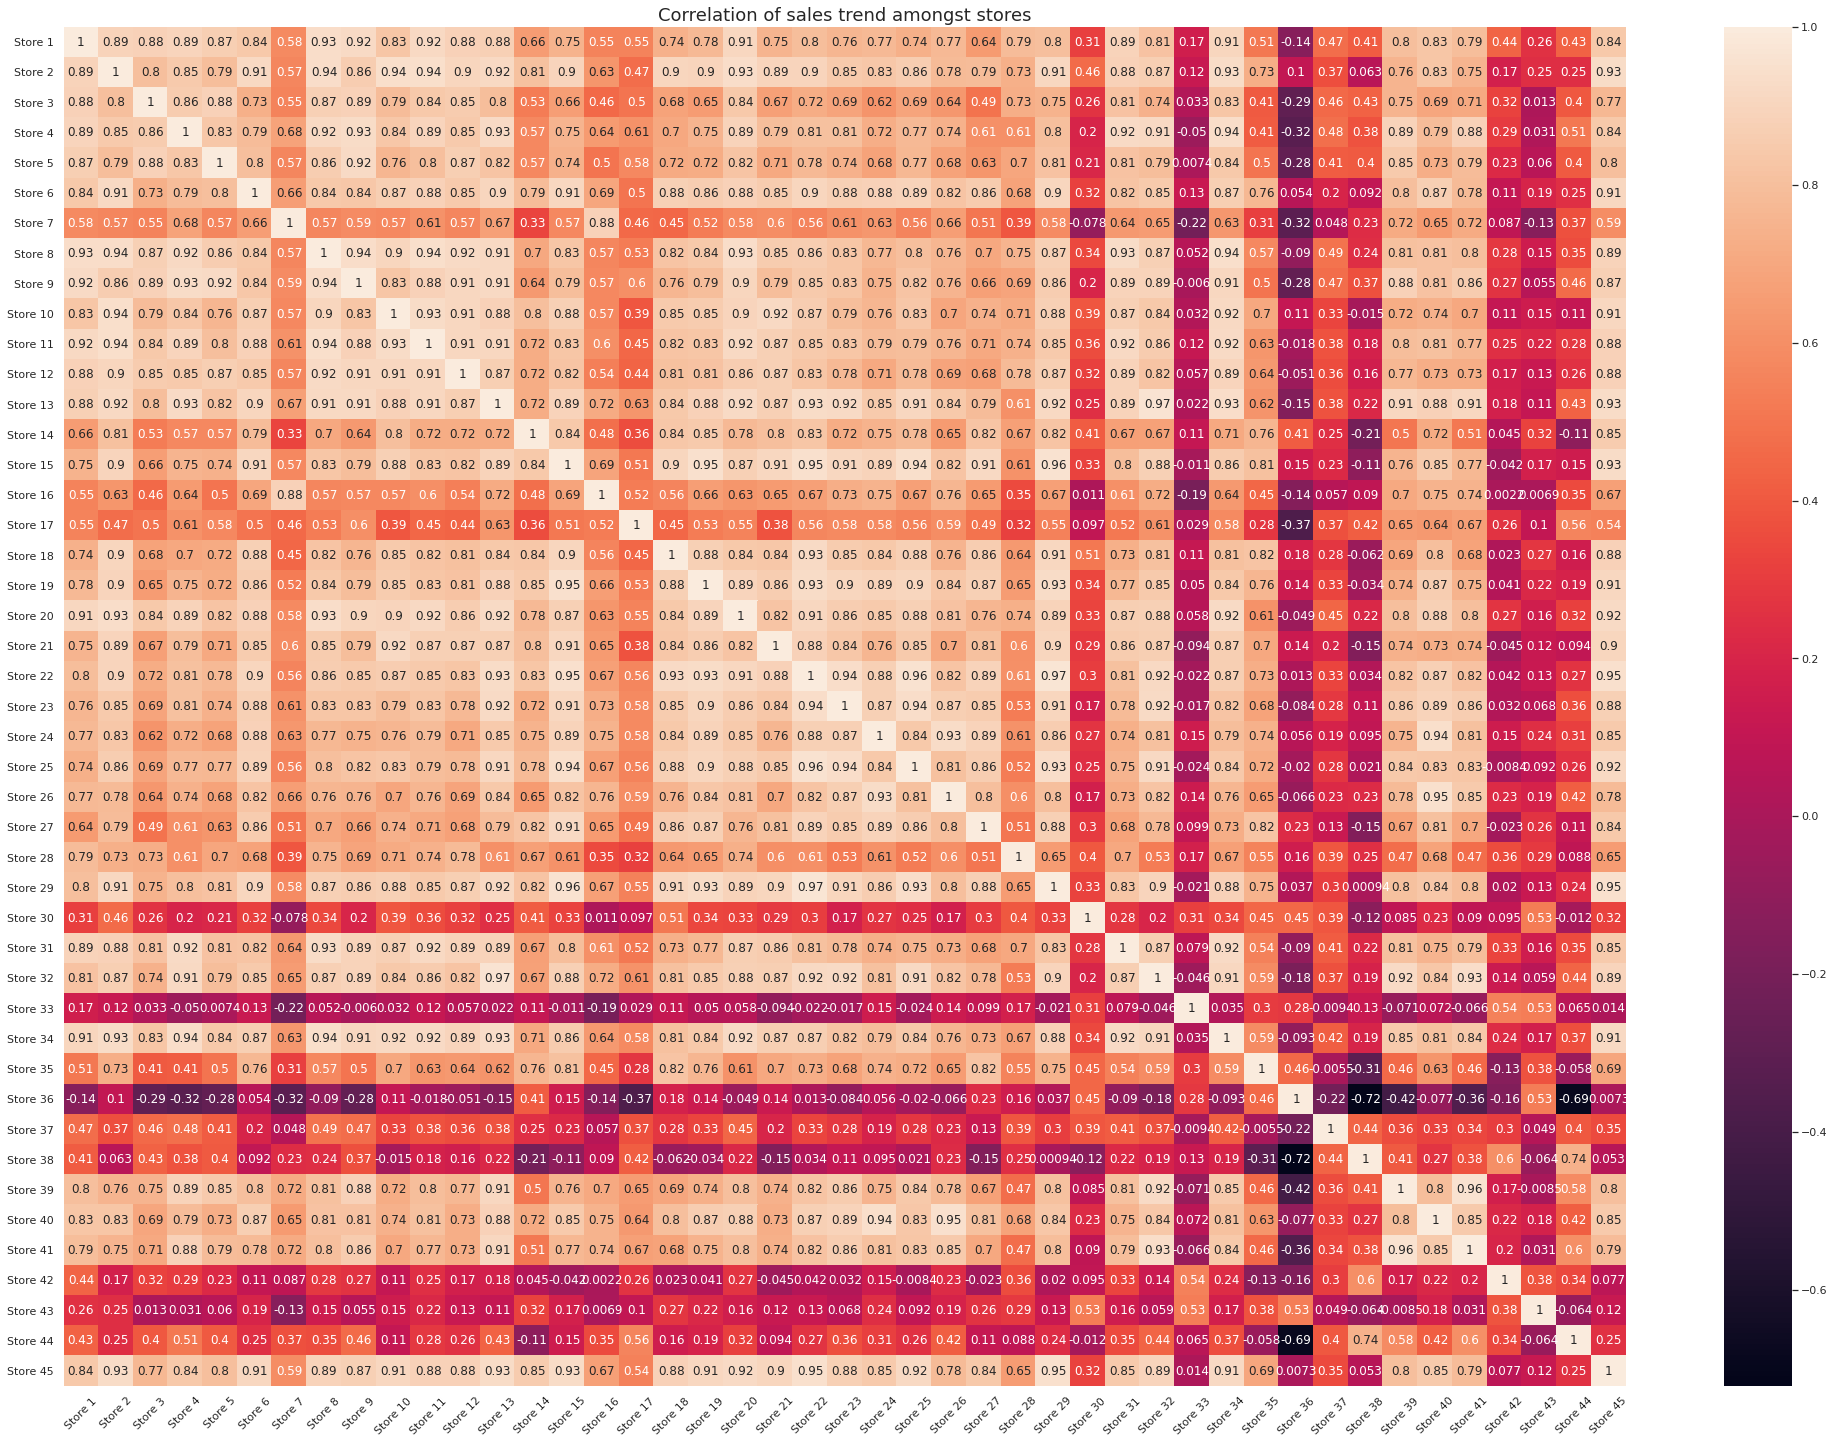

In [18]:
sales_history_by_store =pd.DataFrame([])
for i in dataset['Store'].unique():
  sales_history_by_store['Store '+str(i)]= np.array(dataset['Weekly_Sales'][dataset['Store'] == i])

plt.figure(figsize=(35,25))
sns.heatmap(sales_history_by_store.corr(), annot=True)
plt.title('Correlation of sales trend amongst stores', fontsize=18);
plt.xticks(rotation =45);

In [19]:
dataset['QRTR'] = dataset['Date'].apply(lambda x : (x.month-1)//3+1)
dataset['QRTR']

0       1
1       1
2       1
3       1
4       1
       ..
6430    3
6431    4
6432    4
6433    4
6434    4
Name: QRTR, Length: 6435, dtype: int64

In [20]:
qtrly_sales = pd.DataFrame([])
for i in dataset['QRTR'].unique():
  l =[]
  for j in dataset['Store'].unique():
    l.append(dataset['Weekly_Sales'][(dataset['Store']==j) & (dataset['QRTR']== i)].sum())
  qtrly_sales['Quarter ' + str(i)] = l
qtrly_sales.index = ['Store ' + str(i) for i in dataset['Store'].unique()]
qtrly_sales

,Quarter 1,Quarter 2,Quarter 3,Quarter 4
Store 1,51089714.93,60428109.28,60156360.07,50728624.57
Store 2,62960553.56,74356863.71,73449989.13,64615034.58
Store 3,13456400.94,15459189.58,15218138.65,13453005.90
Store 4,68088751.81,79302988.73,81194592.89,70957619.95
Store 5,10204160.99,12523263.09,12166295.19,10581969.63
Store 6,49374530.75,61906682.20,60887901.64,51587016.05
Store 7,18662263.00,19601375.00,24468442.84,18866194.30
Store 8,29806904.44,34970658.35,34745292.91,30428325.43
Store 9,17432552.80,21323863.59,20661261.58,18371541.02
Store 10,63315902.90,71661999.54,71253937.65,65385873.80


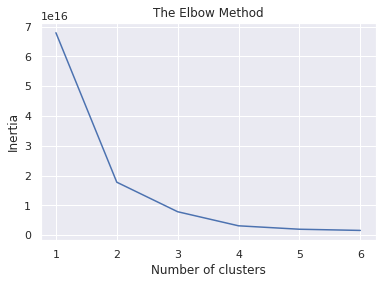

In [21]:
w=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters = i, init='k-means++',n_init=10,max_iter=50, random_state = 0).fit(qtrly_sales)
    labels=kmeans.predict(qtrly_sales)
    kmeans_labels = kmeans.labels_
    w.append(kmeans.inertia_)
plt.plot(range(1,7),w)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


2,3,4 all seem valid use silhouette score to decide

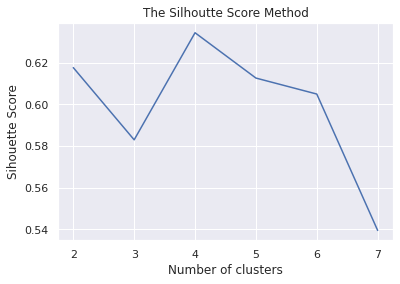

In [22]:
from sklearn.metrics import silhouette_score
w=[]
for i in range(2,8):
    kmeans = KMeans(n_clusters = i, init='k-means++',n_init=10,max_iter=50, random_state = 0).fit(qtrly_sales)
    labels=kmeans.predict(qtrly_sales)
    kmeans_labels = kmeans.labels_
    w.append(silhouette_score(qtrly_sales, kmeans.labels_, metric = 'euclidean'))
#print(labels)

plt.plot(range(2,8),w)
plt.title('The Silhoutte Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sihouette Score')
plt.show()

selecting 4 clusters as confirmed by sihouette method

In [23]:
kmeans = KMeans(n_clusters = 4, init='k-means++',n_init=10,max_iter=50, random_state = 0).fit(qtrly_sales)
labels=kmeans.predict(qtrly_sales)
qtrly_sales['cluster_number'] = kmeans.labels_
qtrly_sales

,Quarter 1,Quarter 2,Quarter 3,Quarter 4,cluster_number
Store 1,51089714.93,60428109.28,60156360.07,50728624.57,2
Store 2,62960553.56,74356863.71,73449989.13,64615034.58,1
Store 3,13456400.94,15459189.58,15218138.65,13453005.90,3
Store 4,68088751.81,79302988.73,81194592.89,70957619.95,1
Store 5,10204160.99,12523263.09,12166295.19,10581969.63,3
Store 6,49374530.75,61906682.20,60887901.64,51587016.05,2
Store 7,18662263.00,19601375.00,24468442.84,18866194.30,3
Store 8,29806904.44,34970658.35,34745292.91,30428325.43,0
Store 9,17432552.80,21323863.59,20661261.58,18371541.02,3
Store 10,63315902.90,71661999.54,71253937.65,65385873.80,1


In [24]:
sales_history_by_store =pd.DataFrame([])
for i in dataset['Store'].unique():
  sales_history_by_store['Store '+str(i)]= np.array(dataset['Weekly_Sales'][dataset['Store'] == i])
sales_history_by_store = sales_history_by_store.T
sales_history_by_store['cluster_number'] = qtrly_sales['cluster_number']
sales_history_by_store

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,cluster_number
Store 1,1643690.90,1641957.44,1611968.17,1409727.59,1554806.68,1439541.59,1472515.79,1404429.92,1594968.28,1545418.53,1466058.28,1391256.12,1425100.71,1603955.12,1494251.50,1399662.07,1432069.95,1615524.71,1542561.09,1503284.06,1422711.60,1492418.14,1546074.18,1448938.92,1385065.20,1371986.60,1605491.78,1508237.76,1513080.49,1449142.92,1540163.53,1507460.69,1430378.67,1351791.03,1453329.50,1508239.93,1459409.10,1345454.00,1384209.22,1551659.28,...,1636339.65,1802477.43,1819870.00,1539387.83,1688420.76,1675431.16,1677472.78,1511068.07,1649604.63,1899676.88,1621031.70,1521577.87,1468928.37,1684519.99,1611096.05,1595901.87,1555444.55,1624477.58,1697230.96,1630607.00,1527845.81,1540421.49,1769854.16,1527014.04,1497954.76,1439123.71,1631135.79,1592409.97,1597868.05,1494122.38,1582083.40,1661767.33,1517428.87,1506126.06,1437059.26,1670785.97,1573072.81,1508068.77,1493659.74,2
Store 2,2136989.46,2137809.50,2124451.54,1865097.27,1991013.13,1990483.78,1946070.88,1750197.81,2066187.72,1954689.21,1874957.94,1821990.93,1802450.29,2042581.71,1880752.36,1896937.10,1957113.89,2102539.93,2025538.76,2001636.96,1939927.09,2003940.64,1880902.62,1845879.79,1781717.71,1804246.16,1991909.98,1895601.05,1964335.23,1863840.49,1904608.09,1839128.83,1793903.60,1724557.22,1827440.43,1849921.44,1794355.49,1737947.64,1802755.11,1939061.41,...,1935299.94,2103322.68,2196688.46,1861802.70,1952555.66,1937628.26,1976082.13,1790439.16,1857480.84,2129035.91,1935869.10,1847344.45,1764133.09,1923957.09,1917520.99,2000940.67,1912791.09,1910092.37,2010216.49,1962924.30,1887733.21,1881046.12,2041507.40,1830075.13,1819666.46,1757923.88,1946104.64,1866719.96,1928016.01,1876788.15,1947083.30,1898777.07,1814806.63,1829415.67,1746470.56,1998321.04,1900745.13,1847990.41,1834458.35,1
Store 3,461622.22,420728.96,421642.19,407204.86,415202.04,384200.69,375328.59,359949.27,423294.40,415870.28,354993.26,339976.65,361248.39,399323.86,384357.94,343763.17,350089.23,396968.80,355017.09,364076.85,357346.48,381151.72,349214.18,352728.78,352864.49,347955.05,402635.76,339597.38,351728.21,362134.09,366473.97,352260.97,363064.64,355626.87,358784.10,395107.35,345584.39,348895.98,348591.74,423175.56,...,424960.66,473292.47,475591.08,418925.47,469752.56,445162.05,411775.80,413907.25,407488.84,503232.13,420789.74,434822.13,394616.11,439913.57,431985.36,418112.76,413701.29,432268.53,446336.80,442074.79,419497.95,422965.33,411206.50,416913.10,432424.85,389427.90,419990.29,391811.60,394918.83,412449.67,408838.73,408229.73,407589.16,414392.09,389813.02,443557.65,410804.39,424513.08,405432.70,3
Store 4,2135143.87,2188307.39,2049860.26,1925728.84,1971057.44,1894324.09,1897429.36,1762539.30,1979247.12,1818452.72,1851519.69,1802677.90,1817273.28,2000626.14,1875597.28,1903752.60,1857533.70,1903290.58,1870619.23,1929736.35,1846651.95,1881337.21,1812208.22,1898427.66,1848426.78,1796637.61,1907638.58,2007050.75,1997181.09,1848403.92,1935857.58,1865820.81,1899959.61,1810684.68,1842821.02,1951494.85,1867345.09,1927610.06,1933333.00,2013115.79,...,2173373.91,2374660.64,2427640.17,2226662.17,2206319.90,2202450.81,2214967.44,2091592.54,2089381.77,2470206.13,2105301.39,2144336.89,2064065.66,2196968.33,2127661.17,2207214.81,2154137.67,2179360.94,2245257.18,2234190.93,2197299.65,2128362.92,2224499.28,2100252.61,2175563.69,2048613.65,2174514.13,2193367.69,2283540.30,2125241.68,2081181.35,2125104.72,2117854.60,2119438.53,2027620.23,2209835.43,2133026.07,2097266.85,2149594.46,1
Store 5,317173.10,311825.70,303447.57,270281.63,288855.71,297293.59,281706.41,273282.97,331406.00,328020.49,306858.69,288839.73,298697.84,333522.60,296673.77,301615.49,310013.11,337825.89,296641.91,313795.60,295257.30,305993.27,291808.87,280701.70,274742.63,268

In [25]:
#clusters of Stores following similar Sales trend 
sales_history_by_store['cluster_number'].value_counts()

3    15
0    12
2    11
1     7
Name: cluster_number, dtype: int64

In [26]:
store_list = []
for i in range(4):
  g = sales_history_by_store[sales_history_by_store['cluster_number']==i].index
  h = [int(j.split(" ")[1]) for j in g ]
  store_list.append(h)
store_list

[[8, 12, 17, 18, 21, 22, 25, 26, 34, 35, 40, 45],
 [2, 4, 10, 13, 14, 20, 27],
 [1, 6, 11, 19, 23, 24, 28, 31, 32, 39, 41],
 [3, 5, 7, 9, 15, 16, 29, 30, 33, 36, 37, 38, 42, 43, 44]]

In [27]:
cor_p = pd.DataFrame([])
for i in store_list:
  p = pd.DataFrame([])
#loop2
  for j in i:
    p = pd.concat([p,dataset[dataset['Store']== j]], axis=0)

  cor_p = pd.concat([cor_p, p.drop('Store', axis = 1).corr()['Weekly_Sales'].copy()],axis = 1)
cor_p.drop('QRTR', axis = 0, inplace=True)
cor_p.columns = ['cluster0', 'cluster1','cluster2','cluster3' ]
cor_p

,cluster0,cluster1,cluster2,cluster3
Weekly_Sales,1.000000,1.000000,1.000000,1.000000
Holiday_Flag,0.118701,0.131289,0.128164,0.056252
Temperature,-0.112427,-0.217098,0.071436,-0.218541
Fuel_Price,-0.014617,-0.161536,0.000666,-0.005393
CPI,-0.484112,0.085088,0.135739,0.098163
Unemployment,0.167669,-0.196555,-0.152968,0.072845
Week_number,0.244751,0.273003,0.274329,0.077983


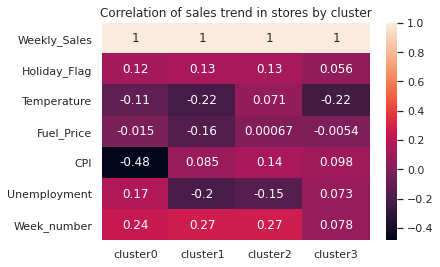

In [28]:
sns.heatmap( cor_p, annot=True)
plt.title('Correlation of sales trend in stores by cluster', fontsize=12);
plt.xticks(rotation =0);

observations: 

cluster0 shows higher sales during holidays and when unemployment is high

cluster1 shows higher sales during holidays and when CPI is high

cluster2 shows higher sales during holidays and when CPI, Temp, CPI is high

cluster3 shows higher sales during holidays and when CPI, unemployment is high

In [29]:
def get_cluster(x,l):
  if x in l:
    return 1
  else:
    return 0


dataset[['is_cluster0','is_cluster1', 'is_cluster2', 'is_cluster3']] = np.zeros([dataset.shape[0],4])
dataset['is_cluster0'] = dataset['Store'].apply(lambda x: get_cluster(x, store_list[0]))
dataset['is_cluster1'] = dataset['Store'].apply(lambda x: get_cluster(x, store_list[1]))
dataset['is_cluster2'] = dataset['Store'].apply(lambda x: get_cluster(x, store_list[2]))
dataset['is_cluster3'] = dataset['Store'].apply(lambda x: get_cluster(x, store_list[3]))

In [30]:
dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_number,QRTR,is_cluster0,is_cluster1,is_cluster2,is_cluster3
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,1,0,0,1,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,1,0,0,1,0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,1,0,0,1,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,1,0,0,1,0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,3,1,0,0,0
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,40,4,1,0,0,0
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,41,4,1,0,0,0
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42,4,1,0,0,0


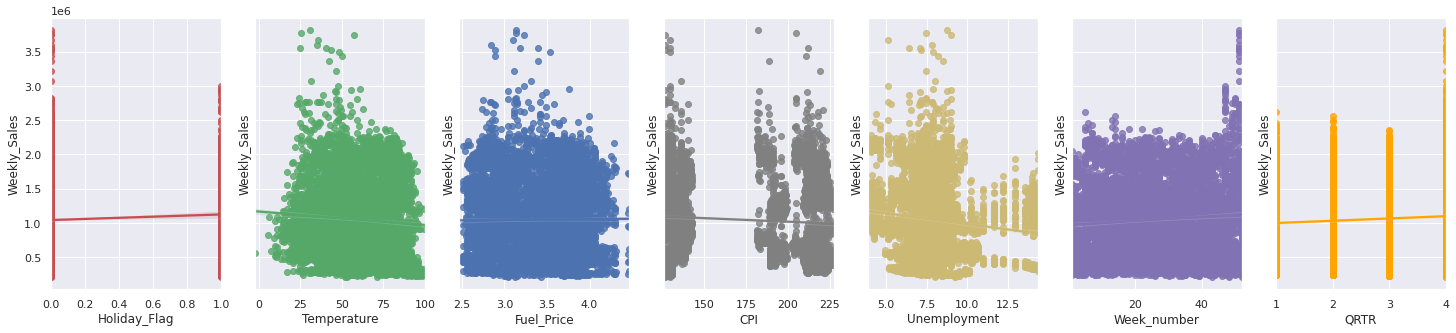

In [31]:
fig,ax = plt.subplots(1,7,figsize=(25,5), sharey=True)
c = ['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Week_number','QRTR']
color = ['r','g','b','gray','y','m','orange']
m = 0
for i in ax:
  sns.regplot(x =c[m], y = 'Weekly_Sales', data =dataset, ax = i, color=color[m])
  m+=1


ARIMA MODEL TO CAPTURE TREND

In [32]:
!pip install statistics

  Created wheel for statistics: filename=statistics-1.0.3.5-cp37-none-any.whl size=7454 sha256=bdcd02bc8c73bd79d59b481066e2e50867c2fd5eeb6555b3a8c7eeb87f20800f
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
Successfully built statistics


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


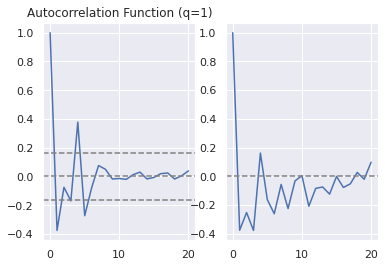

In [33]:
from statsmodels.tsa import stattools as stls
X = dataset.copy()
x = X['Weekly_Sales'][X['Store']==1]
lag_acf = stls.acf( x.diff().dropna(), nlags=20) 
lag_pacf = stls.pacf(x.diff().dropna(), nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(x.diff().dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(x.diff().dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function (q=1)')
#Plot PACF: 
plt.subplot(122) 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray')

                              ARMA Model Results                              
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                     ARMA(1, 1)   Log Likelihood               -1905.374
Method:                       css-mle   S.D. of innovations         148005.363
Date:                Sat, 10 Jul 2021   AIC                           3818.748
Time:                        16:46:03   BIC                           3830.599
Sample:                             0   HQIC                          3823.564
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.555e+06   1.89e+04     82.318      0.000    1.52e+06    1.59e+06
ar.L1.Weekly_Sales     0.4739      0.305      1.553      0.123      -0.124       1.072
ma.L1.Weekly_Sales  

Text(0.5, 1.0, 'RSS: 3133232863901.6172')

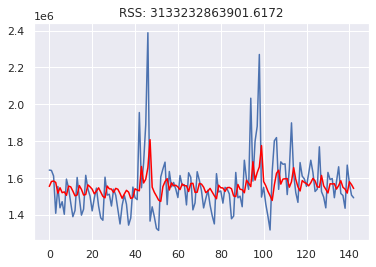

In [34]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(x, order=(1, 1)).fit() # fit model
print(model.summary()) 
plt.plot(x) 
plt.plot(model.predict(), color='red') 
plt.title('RSS: %.4f'% sum((model.fittedvalues-x)**2))

try a different approach sice similar stores are grouped as a cluster, maybe that trend can be captured

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
sc_x = StandardScaler()
sc_y = StandardScaler()
X = dataset.copy()


In [36]:
a = [i for i in range(len(X['Date'])) if X['Date'].iloc[i].year >= 2012]
b = [i for i in range(len(X['Date'])) if X['Date'].iloc[i].year <= 2012]
test_series = X.iloc[a]
train_series = X.iloc[b]

In [37]:
train_series.drop(['Store', 'Date'],axis = 1, inplace = True)
test_series.drop(['Store', 'Date'],axis = 1, inplace = True)
train_series[['Temperature', 'CPI', 'Unemployment','Week_number']] = sc_x.fit_transform(train_series[['Temperature', 'CPI', 'Unemployment','Week_number']])
train_series['Weekly_Sales']= sc_y.fit_transform(train_series['Weekly_Sales'].values.reshape(-1,1))
test_series[['Temperature', 'CPI', 'Unemployment','Week_number']] = sc_x.transform(test_series[['Temperature', 'CPI', 'Unemployment','Week_number']])
test_series['Weekly_Sales'] = sc_y.transform(test_series['Weekly_Sales'].values.reshape(-1,1))


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [38]:
train_series

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_number,QRTR,is_cluster0,is_cluster1,is_cluster2,is_cluster3
0,1.057420,0,-0.995136,2.572,1.004175,0.056964,-1.473530,1,0,0,1,0
1,1.054348,1,-1.201170,2.548,1.007880,0.056964,-1.402749,1,0,0,1,0
2,1.001206,0,-1.124178,2.514,1.009074,0.056964,-1.331968,1,0,0,1,0
3,0.642828,0,-0.760907,2.561,1.009849,0.056964,-1.261187,1,0,0,1,0
4,0.899914,0,-0.767955,2.625,1.010624,0.056964,-1.190406,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,-0.591489,0,0.228602,3.997,0.519270,0.365109,0.933021,3,1,0,0,0
6431,-0.555551,0,0.229144,3.985,0.523256,0.356046,1.003802,4,1,0,0,0
6432,-0.553762,0,-0.335825,4.000,0.527241,0.356046,1.074583,4,1,0,0,0
6433,-0.582715,0,-0.227385,3.969,0.527332,0.356046,1.145364,4,1,0,0,0


**BASELINE MODEL**

[16:46:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


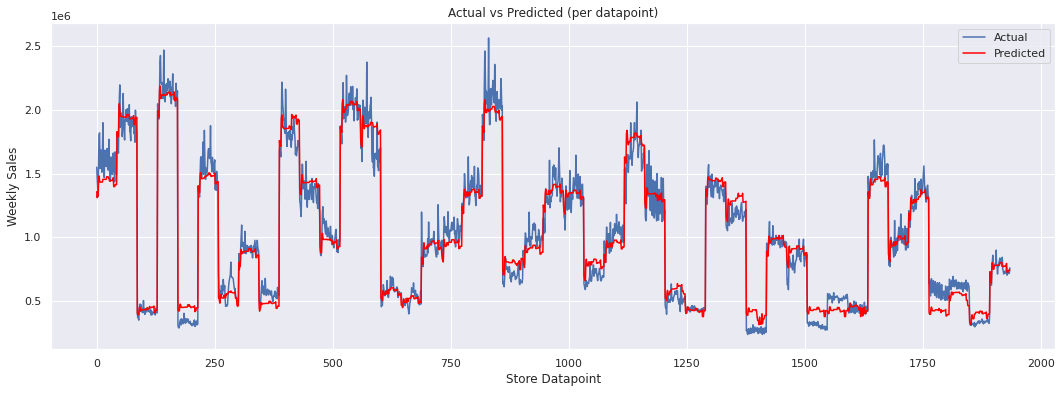

In [39]:
from xgboost import XGBRegressor
model = XGBRegressor(seed = 7)
model.fit(train_series.drop('Weekly_Sales',axis = 1, inplace= False), train_series['Weekly_Sales'])
y_bar = model.predict(test_series.drop('Weekly_Sales',axis = 1, inplace= False))
y_bar = sc_y.inverse_transform(y_bar.reshape(-1,1))
y_act = sc_y.inverse_transform(test_series['Weekly_Sales'].values.reshape(-1,1))
plt.figure(figsize=(18,6))
a = np.arange(0, len(y_bar))
plt.plot(a, y_act, label = 'Actual') ;
plt.plot(a, y_bar, color='red', label = 'Predicted') ;
plt.title("Actual vs Predicted (per datapoint)")
plt.xlabel("Store Datapoint")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()